# Import sklearn news groups data

In [1]:
import pandas as pd
import numpy as np
import re
import nltk

# Inspect the data 

In [2]:
sfdc_data = pd.read_csv('C:/Users/GCNDP/SFDC.csv')
sfdc_data.head()

,Date,Subject*,Call Type,Assigned,Call Object Identifier,Call Recording,Case Number,Case Owner*,Case Subject,Case Status,Case Origin*,Reason*,Case Description,Count of Comments,Last Case Comment,Account Brand and Type,SAP ID,Account Name,Contact Name
0,11/15/2017,"Call 11/15/2017, 3:04:13 PM",Inbound,Debra Greenlee,104792934020171115,http://10.64.30.192:8091/?callid=1047929340,972606.0,Debra Greenlee,JDF credits,Closed,Phone,Credit,Valerie called about duplicate JDF credits on ...,1.0,Valerie called about duplicate JDF credits on ...,National - Dealer,1033841.0,MIDWAY CO-OP LURAY,Valerie Werthmann
1,6/7/2018,"Call 6/7/2018, 8:27:51 AM",Inbound,Debra Greenlee,304737374990180607,http://10.64.30.192:8091/?callid=3047373749,1296323.0,Debra Greenlee,Farmflex Financing reversal,Closed,Phone,Credit,Lisa called entered in a farmflex invoice in e...,1.0,Lisa called entered in a farmflex invoice in e...,National - Dealer,3383451.0,GREENPOINT AG ALTHEIMER,Lisa Waddle
2,5/10/2018,"Call 5/10/2018, 3:11:45 PM",Inbound,Debra Greenlee,304730318670180510,http://10.64.30.192:8091/?callid=3047303186,1267970.0,Debra Greenlee,New C3 user registration,Closed,Phone,Systems Support,Lisa Waddle needed assistance with registering...,1.0,Lisa Waddle needed assistance with registering...,National - Dealer,3383451.0,GREENPOINT AG ALTHEIMER,Lisa Waddle
3,3/7/2018,"Call 3/7/2018, 2:34:32 PM",Inbound,Debra Greenlee,204726086060180307,http://10.64.30.192:8091/?callid=2047260860,1144423.0,Debra Greenlee,MyMonsanto Issue,Closed,Phone,Manage Customer Accounts,"Rahul, Darrell Scott with SAP: 1032247 AGRI AF...",2.0,Darrell called trying access C3 User access to...,National - Dealer,1032247.0,AGRI AFC DECATUR,Darrell Scott
4,6/18/2018,"Call 6/18/2018, 10:09:15 AM",Inbound,Debra Greenlee,304740583190180618,http://10.64.30.192:8091/?callid=3047405831,1305717.0,Debra Greenlee,Farmflex,Closed,Phone,Credit,Jennie looking for farmflex credit on three gr...,1.0,Jennie looking for farmflex credit on three gr...,National - Dealer,3623699.0,TALLAHATCHIE F S CHARLESTON,Jennie Mullen


# Normalize the text, by removing stopwords, punctuation, numeric values...

In [41]:
import re
import nltk
import string
exclude = set(string.punctuation) 
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')
newStopWords = ['lb','j','df','jdf']
stop_words.extend(newStopWords)
table = str.maketrans('', '', string.punctuation)
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
   # doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I)
   # doc = doc.lower()
   # doc = doc.strip()
    # tokenize document
    tokens = doc.split()
    # remove punctuation from each word
    tokens = [w.translate(table) for w in tokens]
    #wpt.tokenize(doc)
    # convert to lower case
    lower_tokens = [w.lower() for w in tokens]
    #remove spaces
    stripped = [w.strip() for w in lower_tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter stopwords out of document
    filtered_tokens = [token for token in words if token not in stop_words]
    #apply Stemming
    #stemmed = [porter.stem(word) for word in filtered_tokens]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [42]:
corpus = sfdc_data['Case Description'].astype(str)
print(corpus[4])

Jennie looking for farmflex credit on three growers.


In [43]:
norm_corpus = normalize_corpus(corpus)
print(norm_corpus[4])
corpus_df = pd.DataFrame(norm_corpus)
#print(corpus_df)

jennie looking farmflex credit three growers


In [44]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in norm_corpus]   

In [45]:
#Pre-process the data removing special characters, quotes etc
from pprint import pprint
data = norm_corpus

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['valerie called duplicate credits winfield statement']


<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:9: DeprecationWarning: invalid escape sequence \s
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:9: DeprecationWarning: invalid escape sequence \s
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:9: DeprecationWarning: invalid escape sequence \s
<ipython-input-45-187a8473d6e3>:6: DeprecationWarning: invalid escape sequence \S
  data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
<ipython-input-45-187a8473d6e3>:9: DeprecationWarning: invalid escape sequence \s
  data = [re.sub('\s+', ' ', sent) for sent in data]


In [46]:
import gensim
from gensim import corpora
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['lb','j','df','jdf'])
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['valerie', 'called', 'duplicate', 'credits', 'winfield', 'statement']]


In [47]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['valerie', 'called', 'duplicate', 'credits', 'winfield', 'statement']


C:\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [48]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
from gensim.utils import simple_preprocess
stop_words = nltk.corpus.stopwords.words('english')
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts):
    texts_out = []
    for sent in texts:
        doc = " ".join(sent) 
        texts_out.append(lemmatizer.lemmatize(token) for token in doc)
    return texts_out

In [49]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
#nlp = spacy.load('en', disable=['parser', 'ner'])
#nlp = spacy.load()

# Do lemmatization keeping only noun, adj, vb, adv
#data_lemmatized = lemmatization(data_words_bigrams)

print(data_words_bigrams[:1])

[['valerie', 'called', 'duplicate', 'credits', 'winfield', 'statement']]


# Create Document Term Matrix from the normalized text, with bigrams

In [57]:
# Create Dictionary
dictionary = corpora.Dictionary(data_words_bigrams)

# Create Corpus
texts = data_words_bigrams

# Create Document Term Matrix from the text
doc_term_matrix = [dictionary.doc2bow(text) for text in texts]

# View
print(doc_term_matrix[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]]


In [51]:
id2word[0]

'called'

In [25]:
#[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:10]]

# Create Gensim LDA Model, with num_topics = 14 (assumed)

In [59]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix,
                                           id2word=id2word,
                                           num_topics=14, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [60]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[doc_term_matrix]

[(0,
  '0.061*"let" + 0.056*"know" + 0.037*"add" + 0.025*"refund" + 0.025*"showing" '
  '+ 0.024*"units" + 0.023*"seed" + 0.022*"cannot" + 0.022*"user" + '
  '0.021*"truck"'),
 (1,
  '0.034*"called" + 0.027*"connect" + 0.024*"list" + 0.021*"gpos" + '
  '0.018*"call" + 0.017*"growers" + 0.015*"trying" + 0.015*"stock" + '
  '0.015*"take" + 0.014*"hour"'),
 (2,
  '0.107*"please" + 0.082*"laura" + 0.073*"update" + 0.072*"send" + '
  '0.066*"bucket" + 0.066*"ylaspick" + 0.066*"date" + 0.065*"complete" + '
  '0.059*"weigle" + 0.038*"dealer"'),
 (3,
  '0.041*"tomorrow" + 0.033*"help" + 0.032*"per" + 0.030*"invoices" + '
  '0.029*"needed" + 0.022*"schedule" + 0.019*"details" + 0.018*"asap" + '
  '0.018*"additional" + 0.017*"winfield"'),
 (4,
  '0.041*"check" + 0.037*"would" + 0.034*"account" + 0.033*"get" + '
  '0.026*"look" + 0.024*"need" + 0.023*"told" + 0.019*"walter" + 0.018*"see" + '
  '0.016*"jim"'),
 (5,
  '0.059*"bags" + 0.028*"corn" + 0.023*"called" + 0.022*"scheduled" + '
  '0.022*"l

# Compute Perplexity and Coherence scores

In [62]:
#Compute Perplexity
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.48683654627762

Coherence Score:  0.4099188983793155


# Visualize the topic keywords

In [63]:
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.085919 -0.258135       1        1  12.859993
6      0.057303  0.065845       2        1  12.089357
2     -0.379112 -0.096792       3        1  11.912855
0      0.070961  0.037800       4        1  10.512471
4      0.042836 -0.127435       5        1   9.171165
5      0.100521 -0.126381       6        1   8.104677
7     -0.059557  0.083104       7        1   6.554092
11     0.039279  0.002596       8        1   6.485777
9     -0.005629  0.105788       9        1   4.547904
8     -0.013256  0.046259      10        1   4.201743
12     0.030709  0.045383      11        1   3.942891
13     0.002912  0.105000      12        1   3.503314
1      0.015659  0.049437      13        1   3.227460
3      0.011456  0.067531      14        1   2.886307, topic_info=     Category       Freq         Term      Total  loglift  logprob
term                                                              
247   Default  41.000000  transaction  41.000000  30.0000  30.0000
379   Default  40.000000           po  40.000000  29.0000  29.0000
380   Default  40.000000     required  40.000000  28.0000  28.0000
329   Default  47.000000       please  47.000000  27.0000  27.0000
468   Default  36.000000        laura  36.000000  26.0000  26.0000
133   Default  41.000000         bags  41.000000  25.0000  25.0000
474   Default  33.000000       update  33.000000  24.0000  24.0000
87    Default  33.000000         send  33.000000  23.0000  23.0000
465   Default  29.000000       bucket  29.000000  22.0000  22.0000
476   Default  29.000000     ylaspick  29.000000  21.0000  21.0000
207   Default  29.000000         date  29.000000  20.0000  20.0000
195   Default  29.000000     complete  29.000000  19.0000  19.0000
475   Default  26.000000       weigle  26.000000  18.0000  18.0000
227   Default  30.000000          let  30.000000  17.0000  17.0000
146   Default  35.000000        order  35.000000  16.0000  16.0000
295   Default  24.000000       return  24.000000  15.0000  15.0000
44    Default  14.000000       access  14.000000  14.0000  14.0000
12    Default  16.000000   mymonsanto  16.000000  13.0000  13.0000
661   Default  12.000000         said  12.000000  12.0000  12.0000
116   Default  34.000000         know  34.000000  11.0000  11.0000
63    Default  21.000000         call  21.000000  10.0000  10.0000
0     Default  49.000000       called  49.000000   9.0000   9.0000
355   Default  13.000000          nan  13.000000   8.0000   8.0000
384   Default  12.000000         ship  12.000000   7.0000   7.0000
22    Default  27.000000      account  27.000000   6.0000   6.0000
60    Default  33.000000        would  33.000000   5.0000   5.0000
29    Default  17.000000       dealer  17.000000   4.0000   4.0000
531   Default  14.000000        check  14.000000   3.0000   3.0000
62    Default  25.000000         back  25.000000   2.0000   2.0000
5     Default  20.000000     winfield  20.000000   1.0000   1.0000
...       ...        ...          ...        ...      ...      ...
463   Topic14   1.030237    afternoon   1.739115   3.0216  -4.6239
45    Topic14   0.826257         path   1.573493   2.9010  -4.8446
680   Topic14   0.622154        maple   1.331028   2.7847  -5.1283
678   Topic14   0.622154       cancel   1.331028   2.7847  -5.1283
681   Topic14   0.622154         reys   1.331028   2.7847  -5.1283
665   Topic14   0.622145      replace   1.331028   2.7847  -5.1283
663   Topic14   0.622145      damaged   1.331028   2.7847  -5.1283
90    Topic14   3.177516     invoices   6.925054   2.7661  -3.4976
212   Topic14   0.456652          mon   1.165524   2.6082  -5.4376
208   Topic14   0.456652          inv   1.165524   2.6082  -5.4376
216   Topic14   0.456652       signed   1.165524   2.6082  -5.4376
334   Topic14   0.456652     kathleen   1.165524   2.6082  -5.4376
205   Topic14   0.456652          bol   1.165524   2.6082  -5.4376
206   Topic

In [64]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel( corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Compute Coherence values with different number of topics and find the optimum number of topics

In [35]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words_bigrams, start=5, limit=15, 
                                                        step=1)

# Visualize the number of topics vs Coherence score

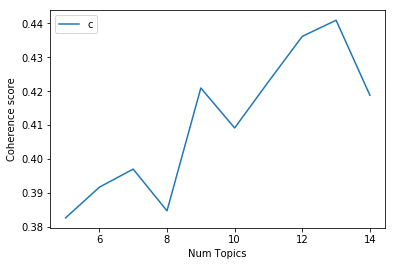

In [36]:
# Show graph
limit=15; start=5; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [37]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 5  has Coherence Value of 0.3826
Num Topics = 6  has Coherence Value of 0.3917
Num Topics = 7  has Coherence Value of 0.397
Num Topics = 8  has Coherence Value of 0.3847
Num Topics = 9  has Coherence Value of 0.4209
Num Topics = 10  has Coherence Value of 0.4092
Num Topics = 11  has Coherence Value of 0.4228
Num Topics = 12  has Coherence Value of 0.4362
Num Topics = 13  has Coherence Value of 0.441
Num Topics = 14  has Coherence Value of 0.4188


# Select the best model and print the topics

In [38]:
# Select the model and print the topics
optimal_model = model_list[8]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=3))

[(0, '0.025*"bags" + 0.021*"order" + 0.021*"customer"'),
 (1, '0.019*"called" + 0.017*"account" + 0.015*"would"'),
 (2, '0.052*"user" + 0.034*"mymonsanto" + 0.023*"id"'),
 (3, '0.016*"return" + 0.015*"mymonsanto" + 0.015*"called"'),
 (4, '0.015*"winfield" + 0.014*"ship" + 0.014*"would"'),
 (5, '0.024*"called" + 0.017*"know" + 0.012*"let"'),
 (6, '0.020*"called" + 0.018*"order" + 0.017*"winfield"'),
 (7, '0.040*"please" + 0.033*"laura" + 0.028*"bucket"'),
 (8, '0.040*"laura" + 0.039*"please" + 0.032*"send"'),
 (9, '0.051*"po" + 0.051*"transaction" + 0.051*"required"'),
 (10, '0.027*"complete" + 0.025*"please" + 0.023*"send"'),
 (11, '0.077*"required" + 0.077*"po" + 0.077*"transaction"'),
 (12, '0.020*"refund" + 0.018*"called" + 0.017*"sent"')]


# Print the original text with the topic keywords

In [39]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.8681,"called, know, let, back, refund, like, check, ...",valerie called duplicate credits winfield stat...
1,1,3.0,0.9161,"return, mymonsanto, called, know, connect, bag...",lisa called entered farmflex invoice error nee...
2,2,4.0,0.9077,"winfield, ship, would, needed, bags, businessl...",lisa waddle needed assistance registering winf...
3,3,5.0,0.9702,"called, know, let, back, refund, like, check, ...",rahul darrell scott sap agri afc decatur acces...
4,4,12.0,0.8681,"refund, called, sent, statement, balance, grow...",jennie looking farmflex credit three growers
5,5,8.0,0.5100,"laura, please, send, date, complete, update, b...",vicki needed help access new path winfield bus...
6,6,3.0,0.9423,"return, mymonsanto, called, know, connect, bag...",talked charles tfc presently carroll fc monsan...
7,7,4.0,0.9161,"winfield, ship, would, needed, bags, businessl...",deltapine gpos reporting showing agrimine megh...
8,8,3.0,0.4624,"return, mymonsanto, called, know, connect, bag...",roman needed help new path gpos access stock t...
9,9,2.0,0.8681,"user, mymonsanto, id, grower, access, acces, e...",cliff needed pricing emailing price cards


In [81]:
print(data[0])

valerie called duplicate credits winfield statement


In [82]:
print(data[1])

lisa called entered farmflex invoice error needed help reverse mymonsanto


In [83]:
print(data[2])

lisa waddle needed assistance registering winfield businesslink new user


In [84]:
print(data[3])

rahul darrell scott sap agri afc decatur accessing mymonsanto connect error dealer orders mymonsanto error account located coastal region dealer enters dealer orders grower orders sap agri afc decatur al


In [85]:
print(data[4])

jennie looking farmflex credit three growers
